# Statistics of LSPIV videos
Sten Schurer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tabulate import tabulate
import glob

load 3 txt files. Average.txt contains the x, y values and u_avg, v_avg values. Amount of values has values_u and N_2.
Values_u and values_v have a hit at the same time. Stdv contains all velocity values per window. 

In [2]:
pth  = r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/LSPIV/Edited/After rain/OSGGC_T1.8/'
xy   = np.loadtxt(os.path.join(pth, 'average.txt'))
d    = np.loadtxt(os.path.join(pth, 'amount_of_values.txt'))
stdf = np.loadtxt(os.path.join(pth, 'stdv_file.txt'))

if len(stdf) == 1537:
    cor  = np.loadtxt(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/LSPIV/Edited/After rain/XY_after_rain.txt')
elif len(stdf) == 6313:
    cor  = np.loadtxt(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/LSPIV/Edited/After rain/XY_after_rain_W50.txt')
elif len(stdf) == 5985:
    cor  = np.loadtxt(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/LSPIV/Edited/After rain/XY_after_rain_W100.txt')
else:
    cor  = np.loadtxt(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/LSPIV/Edited/After rain/XY_after_rain_W200.txt') 

x        = x coordinate of the cell  
y        = y coordinate of the cell  
u_avg    = average speed in u direction of the cell (only of cells that have more than 50% of the time a hit)  
v_avg    = average speed in v direction of the cell (only of cells that have more than 50% of the time a hit)  
values_u = number of hits per cell  
N_2      = only shows the number of hits per cell in cells that have more than 50% of the time a hit

In [3]:
xy = pd.DataFrame(xy)
d  = pd.DataFrame(d)
data  = pd.concat([xy, d], axis=1, sort=False)

data.columns = ['X', 'Y', 'u_avg', 'v_avg', 'mask_avg', 'values_u', 'N_2', 'uu', 'vv', 'mask']
data = data.drop(['mask_avg', 'uu', 'vv', 'mask'], axis=1)
print(data)

             X        Y  u_avg  v_avg  values_u  N_2
0       2.2895  67.0444    NaN    NaN       0.0  0.0
1       4.6022  67.0444    NaN    NaN       0.0  0.0
2       6.9149  67.0444    NaN    NaN       0.0  0.0
3       9.2276  67.0444    NaN    NaN       0.0  0.0
4      11.5402  67.0444    NaN    NaN       0.0  0.0
...        ...      ...    ...    ...       ...  ...
1532  113.2979   2.2895    NaN    NaN       1.0  0.0
1533  115.6105   2.2895    NaN    NaN       0.0  0.0
1534  117.9232   2.2895    NaN    NaN       0.0  0.0
1535  120.2359   2.2895    NaN    NaN       0.0  0.0
1536  122.5486   2.2895    NaN    NaN       0.0  0.0

[1537 rows x 6 columns]


# Get the statistics
Cells with hits  (number of values > 0 in values_u)  
Average hits (average of values > 0  in values_u)  
Cells with more than 50% of the time a hit (number of values > 0 in N_2)  
Average velocity (vector u_avg + vector v_avg, both positive numbers, devided by the cells with hits > 50%)

In [4]:
Edit               = 'Edit'
N                  = len(stdf[0])
Grid_Cells         = len(stdf) 

# Cells with hits
# use values_u and not u_avg because u_avg is only the average over >n/2
Cells_w_hits    = 0
values             = data.loc[:, 'values_u']
for i in range(len(data)):
    if values[i] > 0:
        Cells_w_hits += 1
Cells_with_hits = (Cells_w_hits / Grid_Cells) * 100

# Average hits
hits = 0
for i in range(len(data)):
    if values[i] > 0:
        hits += values[i]
        Average_hits = hits/Cells_w_hits
Average_nr_of_hits = (Average_hits / N) * 100

#>N/2
N2 = 0
values2 = data.loc[:, 'N_2']
for i in range(len(data)):
    if values2[i] > 0:
        N2 += 1
N_2 = (N2 / Grid_Cells) * 100

# Average velocity
vector           = abs(data.loc[:, 'u_avg']) + abs(data.loc[:, 'v_avg'])
total_velocity   = np.nansum(vector)
Average_velocity = total_velocity/N2

## STDV
Open all stdv files and remove all columns but the last. Concatenate all columns and save the stdv_file

In [5]:
stdevS = stdf.std(1)                 # S is sample of the population (axis=1)
stdevP = np.nanstd(stdf, axis = 1)   # P is population (use P)

Average_stdevS = np.nanmean(stdevS)
Average_stdevP = np.nanmean(stdevP)

C:\Users\SSchurer\anaconda3\envs\thesis\lib\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


## Include XY coordinates (After Rain)
0,0 is 30.21655562, -14.99441326 for: After Rain  
For windowsize 100 overlap 50 the following parameters apply:  
The scaling factor is 21.62 pix/m  
windowsize = 100  
overlap    = 50  
pixels     = 2704 x 1520
grid cells = 29 x 53

In [6]:
XY = pd.DataFrame(cor)
XY.columns = ['long', 'lat', 'index']
DATA = pd.concat([XY, data], axis=1, sort=False)
pd.set_option("display.precision", 15)
print(DATA)

                    long                 lat   index                    X  \
0     30.217712355384599 -14.994338339999995     0.0    2.289500000000000   
1     30.217690285192290 -14.994339534999996     1.0    4.602200000000000   
2     30.217668214999982 -14.994340729999996     2.0    6.914900000000000   
3     30.217646144807677 -14.994341924999997     3.0    9.227600000000001   
4     30.217624074615369 -14.994343119999996     4.0   11.540200000000000   
...                  ...                 ...     ...                  ...   
1532  30.216621550769229 -14.993769520000001  1532.0  113.297899999999998   
1533  30.216599480576921 -14.993770715000000  1533.0  115.610500000000002   
1534  30.216577410384616 -14.993771910000000  1534.0  117.923199999999994   
1535  30.216555340192308 -14.993773105000001  1535.0  120.235900000000001   
1536  30.216533269999999 -14.993774300000000  1536.0  122.548599999999993   

                       Y  u_avg  v_avg  values_u  N_2  
0     67.0443999999

## Current meter velocity

In [7]:
CM  = np.loadtxt(r'C:/Users/SSchurer/Documents/TU_Delft/Thesis/Current_meter/flow_velocity.txt', skiprows=(1))
CMM = pd.DataFrame(CM)
CMM.columns = ['Latitude', 'Longitude', 'Velocity']

CM1           = 35
CM1_vel       = CMM['Velocity'].iloc[34]
CM2           = 36
CM2_vel       = CMM['Velocity'].iloc[35]
CM3           = 37
CM3_vel       = CMM['Velocity'].iloc[36]
CM4           = 41
CM4_vel       = CMM['Velocity'].iloc[40]
CM5           = 42
CM5_vel       = CMM['Velocity'].iloc[41]
CM6           = 38
CM6_vel       = CMM['Velocity'].iloc[37]
CM7           = 39
CM7_vel       = CMM['Velocity'].iloc[38]
CM8           = 40
CM8_vel       = CMM['Velocity'].iloc[39]

CM1_line      = 1455
CM2_line      = 1405
CM3_line      = 1197
CM4_line      = 937
CM5_line      = 774
CM6_line      = 940
CM7_line      = 784
CM8_line      = 736

CM1_line_W50  = 6042
CM2_line_W50  = 5726
CM3_line_W50  = 4877
CM4_line_W50  = 3925
CM5_line_W50  = 3062
CM6_line_W50  = 3824
CM7_line_W50  = 3189
CM8_line_W50  = 2877

CM1_line_W100 = 5719
CM2_line_W100 = 5409
CM3_line_W100 = 4681
CM4_line_W100 = 3641
CM5_line_W100 = 2900
CM6_line_W100 = 3648
CM7_line_W100 = 3024
CM8_line_W100 = 2718

CM1_line_W200 = 349
CM2_line_W200 = 325
CM3_line_W200 = 275
CM4_line_W200 = 225
CM5_line_W200 = 172
CM6_line_W200 = 227
CM7_line_W200 = 202
CM8_line_W200 = 178

print(CM1_vel, CM2_vel, CM3_vel, CM4_vel, CM5_vel, CM6_vel, CM7_vel, CM8_vel)
average_vel = np.mean([CM1_vel, CM2_vel, CM3_vel, CM4_vel, CM5_vel, CM6_vel, CM7_vel, CM8_vel])
print(average_vel)
# print(DATA.loc[CM8_line])

0.93 1.24 1.3 1.25 1.55 1.01 0.62 0.55
1.05625


## Mean Absolute Deviation (MAD)

In [8]:
CM1_row = []
CM2_row = []
CM3_row = []
CM4_row = []
CM5_row = []
CM6_row = []
CM7_row = []
CM8_row = []

row     = [CM1_row, CM2_row, CM3_row, CM4_row, CM5_row, CM6_row, CM7_row, CM8_row]
line    = [CM1_line, CM2_line, CM3_line, CM4_line, CM5_line, CM6_line, CM7_line, CM8_line]
line50  = [CM1_line_W50, CM2_line_W50, CM3_line_W50, CM4_line_W50, CM5_line_W50, CM6_line_W50, CM7_line_W50, CM8_line_W50]
line100 = [CM1_line_W100, CM2_line_W100, CM3_line_W100, CM4_line_W100, CM5_line_W100, CM6_line_W100, CM7_line_W100, CM8_line_W100]
line200 = [CM1_line_W200, CM2_line_W200, CM3_line_W200, CM4_line_W200, CM5_line_W200, CM6_line_W200, CM7_line_W200, CM8_line_W200]

velocity = pd.DataFrame(stdf)

for i in range(len(row)):
    if len(stdf) == 1537:
        r = velocity.iloc[line[i]]
        row[i].append(r)
    elif len(stdf) == 6313:
        r = velocity.iloc[line50[i]]
        row[i].append(r)
    elif len(stdf) == 5985:
        r = velocity.iloc[line100[i]]
        row[i].append(r)
    else:
        r = velocity.iloc[line200[i]]
        row[i].append(r)

mad1 = []
mad2 = []
mad3 = []
mad4 = []
mad5 = []
mad6 = []
mad7 = []
mad8 = []
print(np.nanmean(row[1]))
vel = [CM1_vel, CM2_vel, CM3_vel, CM4_vel, CM5_vel, CM6_vel, CM7_vel, CM8_vel]
mad = [mad1, mad2, mad3, mad4, mad5, mad6, mad7, mad8]

for i in range(len(vel)):
    for j in range(len(CM1_row)):
        nr = abs(vel[i]) - abs(row[i][j])
        mad[i].append(abs(nr.mean()))     

MAD = pd.DataFrame(mad1 + mad2 + mad3 + mad4 + mad5 + mad6 + mad7 + mad8)
print(MAD)
mad_average = np.nanmean(MAD)

CM1_row = pd.DataFrame(CM1_row[0])
CM2_row = pd.DataFrame(CM2_row[0])
CM3_row = pd.DataFrame(CM3_row[0])
CM4_row = pd.DataFrame(CM4_row[0])
CM5_row = pd.DataFrame(CM5_row[0])
CM6_row = pd.DataFrame(CM6_row[0])
CM7_row = pd.DataFrame(CM7_row[0])
CM8_row = pd.DataFrame(CM8_row[0])

1.0334326923076922
                   0
0                NaN
1  0.206567307692308
2  0.071152941176471
3  0.033615000000000
4  0.295226612903226
5  0.134502734375000
6                NaN
7  0.310983333333333


## Make table

In [9]:
table = [[Edit, N+1, Grid_Cells, np.round(Cells_with_hits, 0), np.round(Average_nr_of_hits, 0), np.round(N_2, 0), np.round(Average_velocity, 2), np.round(Average_stdevP, 3), np.round(mad_average, 3)] ]
headers=['Edit', 'Images', 'Grid cells', '% hits', 'Average % hits', '% cells >N/2', 'Average velocity', 'Average STDV', 'MAD']

tab = (tabulate(table, headers, tablefmt="plain"))
print(tab)

Edit      Images    Grid cells    % hits    Average % hits    % cells >N/2    Average velocity    Average STDV    MAD
Edit         300          1537        35                31               9                1.08           0.276  0.175


## Make plots
Creating a dataframe with 2 columns. 1 all LSPIV values in the window closest to the CM measurement (length of the column is number of images). 2 Current Meter measurement belonging to the cell. 

In [10]:
CMD1 = []
CMD2 = []
CMD3 = []
CMD4 = []
CMD5 = []
CMD6 = []
CMD7 = []
CMD8 = []
CMD  = [CMD1, CMD2, CMD3, CMD4, CMD5, CMD6, CMD7, CMD8]
row  = [CM1_row, CM2_row, CM3_row, CM4_row, CM5_row, CM6_row, CM7_row, CM8_row]

for i in range (len(CMD)):
    V  = np.array([vel[i]])
    CX = np.repeat(V, 299)
    CXX = pd.DataFrame(CX)
    CMX = pd.concat([row[i], CXX], axis=1, sort=False)
    CMD[i].append([CMX])
    
CMD1 = pd.DataFrame(CMD1[0][0])
CMD2 = pd.DataFrame(CMD2[0][0])
CMD3 = pd.DataFrame(CMD3[0][0])
CMD4 = pd.DataFrame(CMD4[0][0])
CMD5 = pd.DataFrame(CMD5[0][0])
CMD6 = pd.DataFrame(CMD6[0][0])
CMD7 = pd.DataFrame(CMD7[0][0])
CMD8 = pd.DataFrame(CMD8[0][0])

CMT = np.vstack((CMD1, CMD2, CMD3, CMD4, CMD5, CMD6, CMD7, CMD8))
CMT = pd.DataFrame(CMT)
CMT.columns = ['LSPIV', 'CM']

C:\Users\SSchurer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
C:\Users\SSchurer\anaconda3\envs\thesis\lib\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


      X                  Y                  E    H
0  1.24  1.033432692307692  0.325464573117090   52
1  1.30  1.228847058823529  0.413395633977772  187
2  1.25  1.216385000000000  0.320328629535357  160
3  1.55  1.254773387096774  0.222950712081302  124
4  1.01  1.144502734375000  0.361107471927106  256
5  0.55  0.239016666666667  0.086381391064408    6


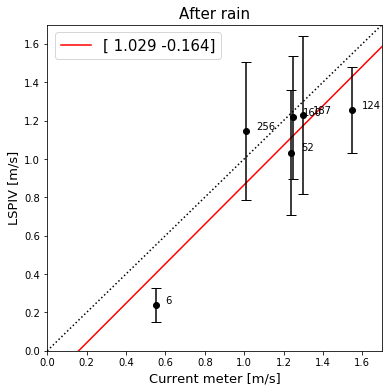

Edit      Images    Grid cells    % hits    Average % hits    % cells >N/2    Average velocity    Average STDV    MAD
Edit         300          1537        35                31               9                1.08           0.276  0.175


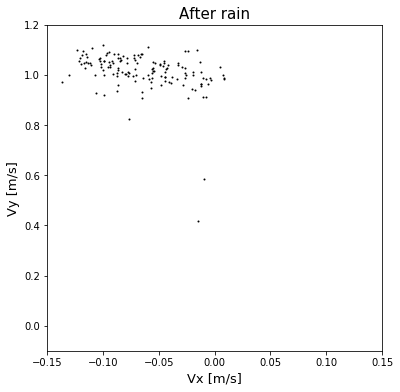

In [11]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.gca()
ax1.set(ylim=(0, 1.7))
ax1.set(xlim=(0, 1.7))
x = np.linspace(0, 1.8, 10)
one_one = 1*x
plt.plot(one_one, x, 'k:', zorder=0)

hit = [0]*8
for i in range(len(row)):
    for j in range(len(CM1_row)):
        p = np.nan_to_num((row[i]))
        if p[j] > 0:
            hit[i] += 1
hit = np.array([hit])
hit = pd.DataFrame(hit).T

X = pd.DataFrame([CM1_vel, CM2_vel, CM3_vel, CM4_vel, CM5_vel, CM6_vel, CM7_vel, CM8_vel])

y = []
for i in range(len(row)):
    yr = np.nanmean(row[i])
    y.append(yr)
    
Y = pd.DataFrame(y)

e = []
for i in range(len(row)):
    er = np.nanstd(row[i])
    e.append(er)
    
E = pd.DataFrame(e) 

xye = pd.concat([X, Y, E, hit], axis=1, sort=False)
xye.columns=['X', 'Y', 'E', 'H']
XYE = xye.dropna()
XYE.index = np.arange(XYE.shape[0])

print(XYE)
plt.errorbar(XYE['X'], XYE['Y'], XYE['E'], capsize=5, linestyle='', marker ='o', color='k')

polynomial = np.polyfit(XYE['X'], XYE['Y'], 1)

#plot the polynomial
ynew = np.poly1d(polynomial)
poly_track_rtk_Z = pd.DataFrame(ynew(x))
plt.plot(x, poly_track_rtk_Z, 'r', label= np.round(polynomial, 3), zorder=1)
plt.xlabel('Current meter [m/s]', fontsize=13)
plt.ylabel('LSPIV [m/s]', fontsize=13)
plt.title('After rain', fontsize = 15)
plt.legend(fontsize=15)

for i in range(len(XYE)):
    plt.annotate(XYE['H'][i], xy=(XYE['X'][i] +0.05, XYE['Y'][i] +0.01))
# plt.savefig('C:/Users/SSchurer/Documents/TU_Delft/Thesis/LSPIV/Results/LSPIV_CM/AR.png')
plt.show()

plt.figure(figsize=(6,6))
ax1 = plt.gca()
ax1.set(ylim=(-0.1, 1.2))
ax1.set(xlim=(-0.15, 0.15))
plt.plot(data.loc[:, 'u_avg'], data.loc[:, 'v_avg'], 'ko', markersize = 1)
# plt.axis('scaled')
plt.xlabel('Vx [m/s]', fontsize=13)
plt.ylabel('Vy [m/s]', fontsize=13)
plt.title('After rain', fontsize=15);

# plt.savefig('C:/Users/SSchurer/Documents/TU_Delft/Thesis/LSPIV/Results/Velocity_vectors/AR.png')
print(tab)


## Get the coordinates and velocity of 5 windows
The 5 windows are chosen on their location and number of calculated velocities